In [2]:
# Install libraries for the notebook
%pip install matplotlib pyyaml

Note: you may need to restart the kernel to use updated packages.


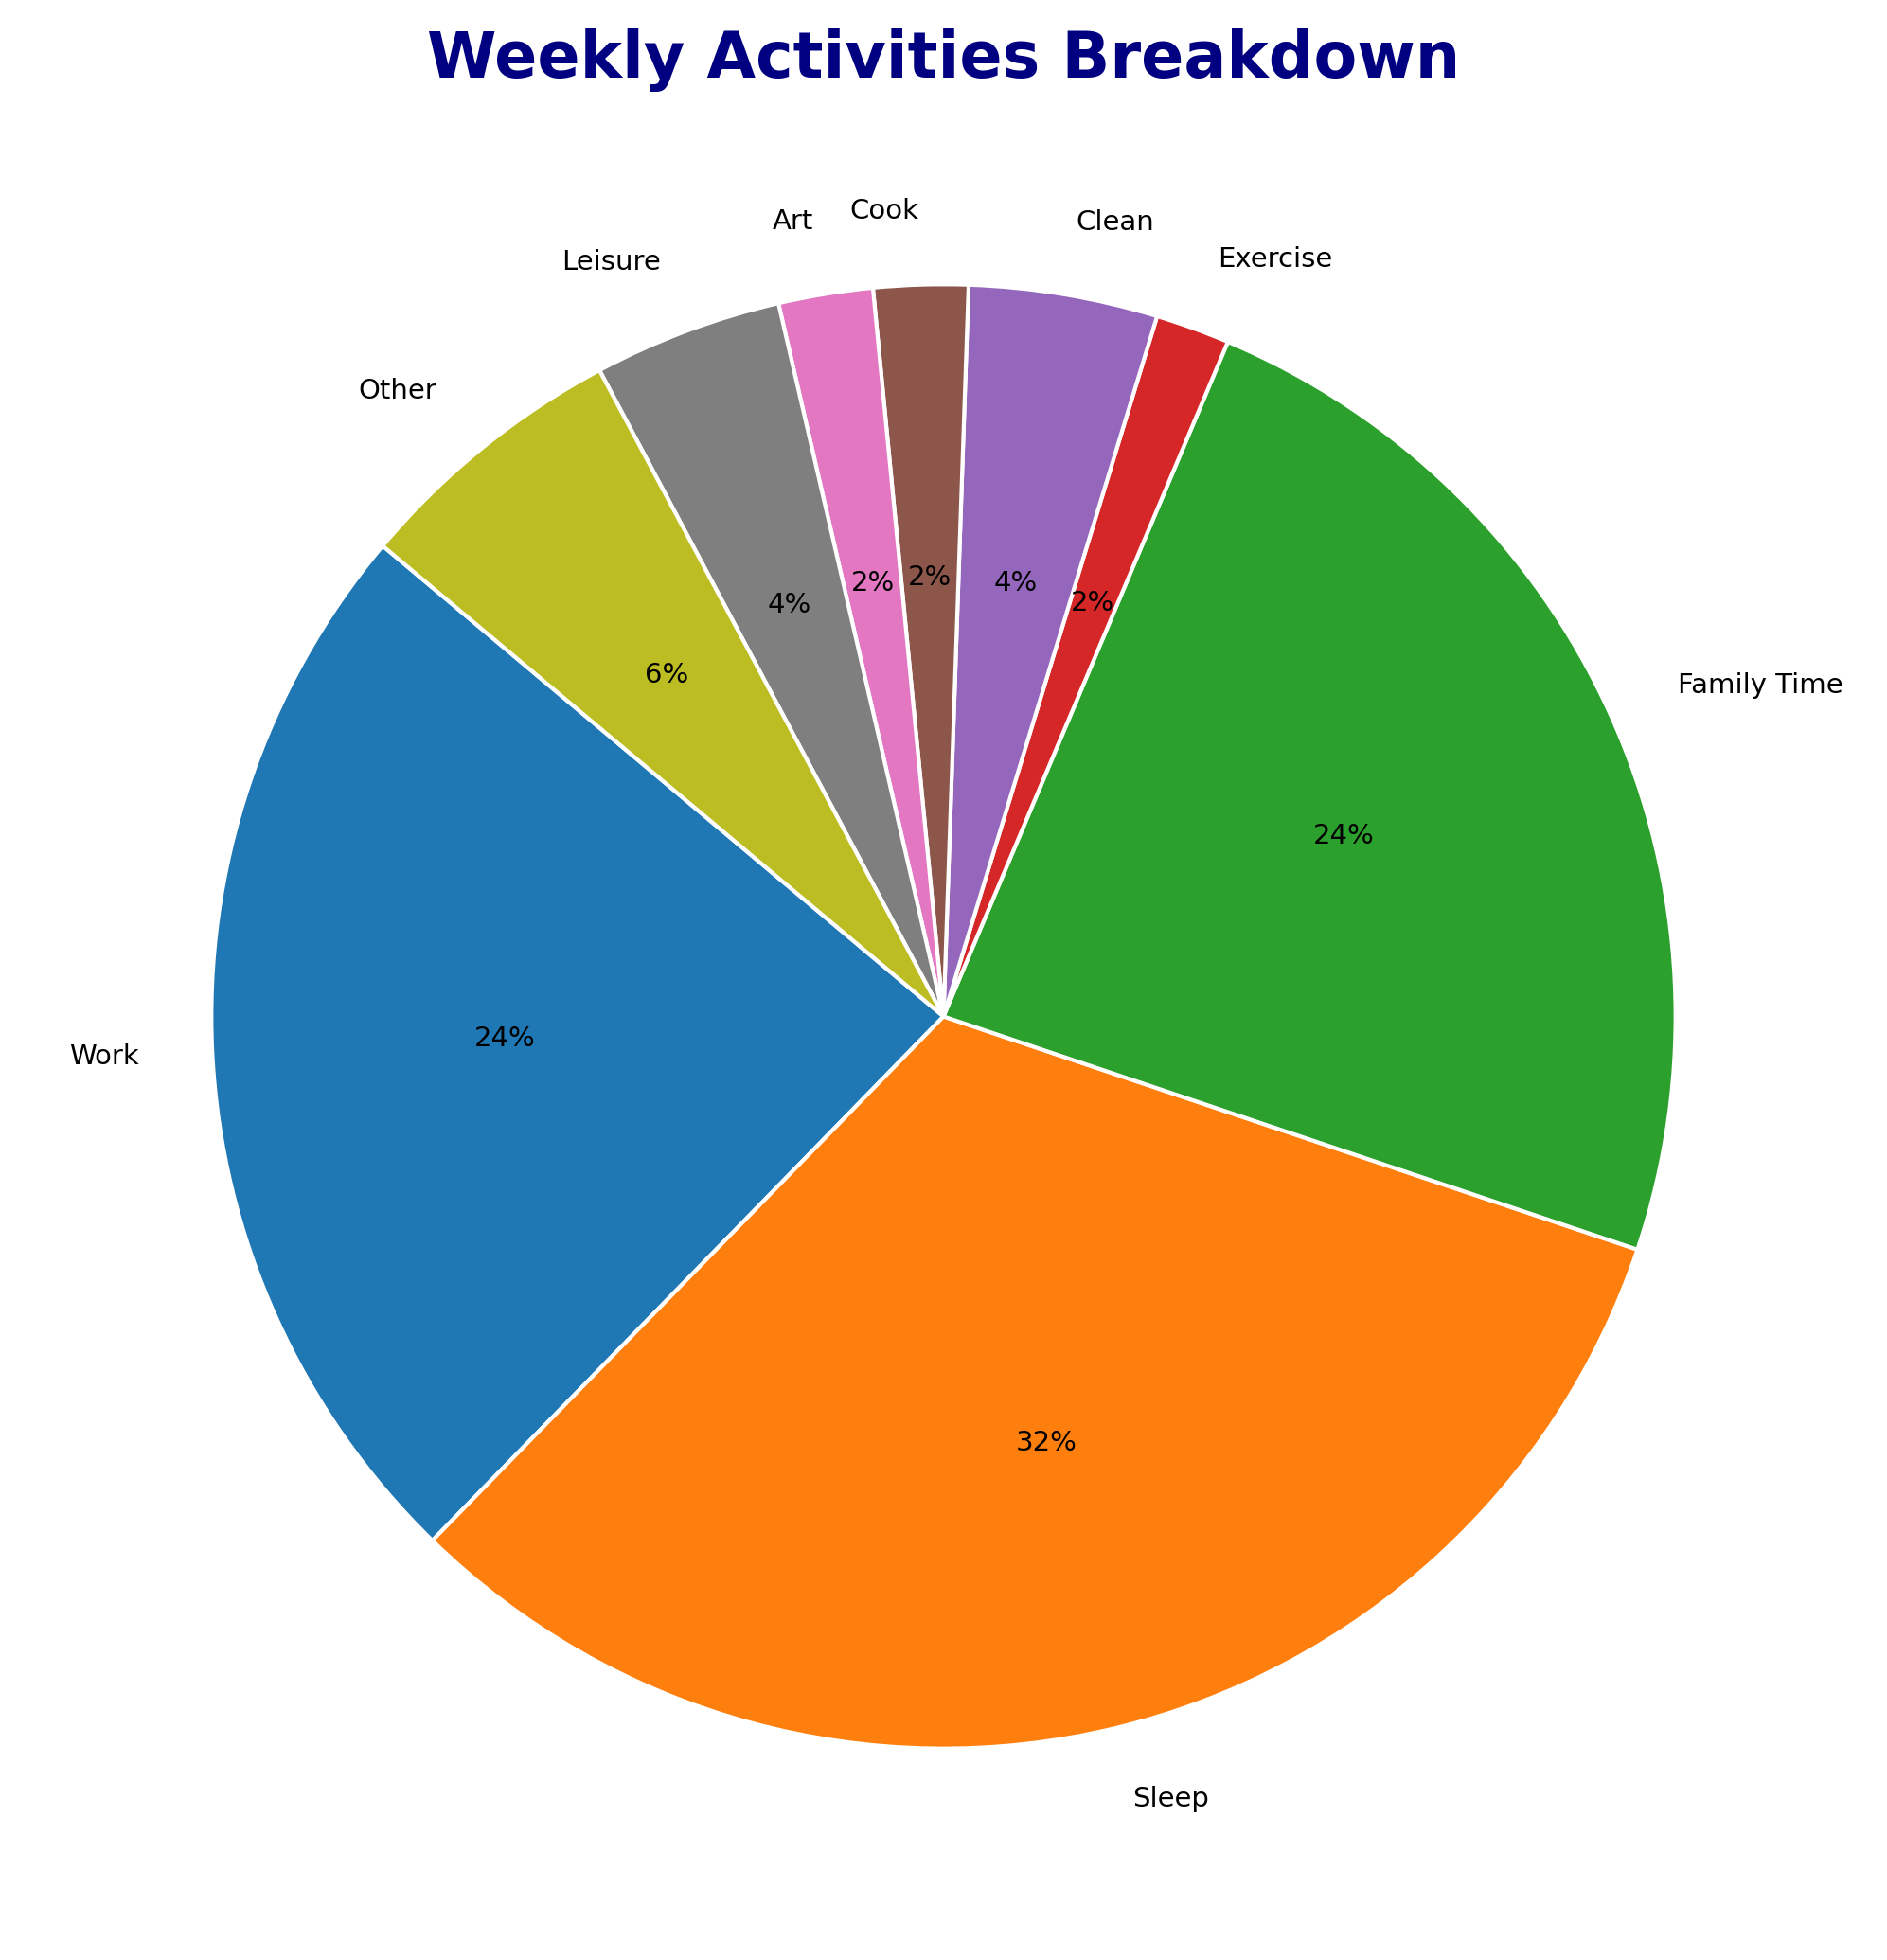

Work: 40 hours
Sleep: 54 hours
Family Time: 40 hours
Exercise: 2.75 hours
Clean: 7.0 hours
Cook: 3.5 hours
Art: 3.5 hours
Leisure: 7 hours
Other: 10.25 hours


In [11]:
import yaml
import matplotlib.pyplot as plt

# Load data
def load_activities_from_yaml(file_path):
    with open(file_path, 'r') as file:
        return yaml.safe_load(file)
data = load_activities_from_yaml('week.yml')

# Complete days with Other
def adjust_data_with_other_category(data):
    days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    for day in days_of_week:
        total_hours_for_day = sum(data[activity].get(day, 0) for activity in data)
        if total_hours_for_day < 24:
            if 'Other' not in data:
                data['Other'] = {}
            data['Other'][day] = 24 - total_hours_for_day
adjust_data_with_other_category(data['Activities'])

# Calculate durations with the 'Other' category included
durations = {activity: sum(days.values()) for activity, days in data['Activities'].items()}

# Generate pie chart
plt.figure(figsize=(10, 7), dpi=300)
plt.pie(durations.values(), labels=durations.keys(), autopct='%1.0f%%', startangle=140, 
        wedgeprops=dict(edgecolor='w'), textprops={'fontsize': 7, 'color': 'black'})
plt.title('Weekly Activities Breakdown', fontsize=16, fontweight='bold', color='navy')
plt.tight_layout()  # Adjust the layout to make room for the legend and title
plt.show()

# Check correct number of hours
def check_daily_hours(data):
    days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    total_week_hours = 0

    for day in days_of_week:
        daily_total = sum(data[activity].get(day, 0) for activity in data)
        if daily_total != 24:
            print(f"Error: {day} does not have 24 hours filled, total hours: {daily_total}")
        total_week_hours += daily_total

    if total_week_hours != 24*7:
        print(f"Error: The total hours for the week do not add up to 168. Total hours: {total_week_hours}")
check_daily_hours(data['Activities'])

# Print Stats about categories
def print_total_per_category(data):
    totals = {activity: sum(days.values()) for activity, days in data.items()}
    for activity, total in totals.items():
        print(f"{activity}: {total} hours")
print_total_per_category(data['Activities'])